#### Import and explor data

In [16]:
#Get competition data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile
  
# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall()

with ZipFile("course_files_export (6).zip", 'r') as zObject:
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall()




In [17]:
import pandas as pd
df= pd.read_csv('/content/Week 4/newcountryvars.csv')
df.head()

,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,India,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799
1,Nigeria,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264
2,Mexico,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680
3,Pakistan,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074
4,Bangladesh,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722


In [18]:
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

In [40]:
X_train = pd.merge(X_train, df, left_on='Country or region', right_on='country_name')
X_test = pd.merge(X_train, df, left_on='Country or region', right_on='country_name')

<BarContainer object of 5 artists>

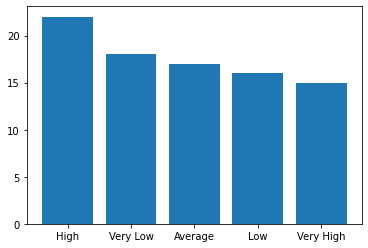

In [23]:
import numpy as np
import matplotlib.pyplot as plt
y_var = pd.DataFrame(y_train_labels.value_counts()).reset_index()

x = y_var['index']
y = y_var[0]
plt.bar(x,y)

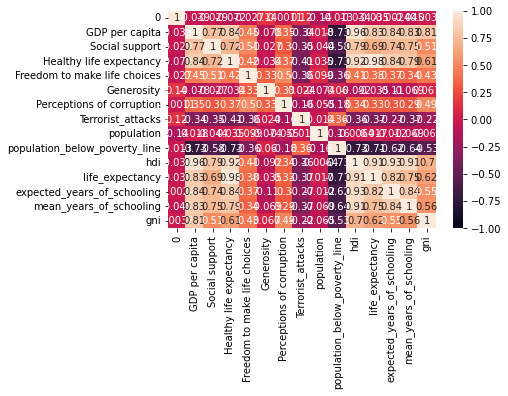

In [24]:
a = recoded_y_train_labels = np.where(y_train_labels == 'Very Low', 1, 
                                  np.where(y_train_labels == 'Low', 2, 
                                           np.where(y_train_labels == 'Average', 3, 
                                                    np.where(y_train_labels == 'High', 4, 5))))
bi_reg= pd.concat([pd.DataFrame(a),X_train],axis=1)
bi_reg.rename(columns={0:"Y_Var"})
cor_matrix = bi_reg.drop(columns=['Country or region','name','sub-region','region']).corr()

import seaborn as sns
sns.heatmap(cor_matrix, vmin=-1, vmax=1, annot=True)

#### Preprocessing exploration:
Creating one of 2 preprocessors: one using the median, the other using the most frequent values. I then run the RandomForestClassifier with an n_estimators=300, max_depth=3 100 times and average all of scores priduced when fitting the model. I then use a ttest to see if there one preprocessor is singnifigantly different than the other.

 There is no signifigant difference, so I will use the median average.

##### Preprocessor 1: Median

In [39]:
X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000,Peru,32165485,22.7,0.739749,74.814,13.38634,9.013470,11294.840330
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111,Nicaragua,6217581,29.6,0.645203,75.212,11.67000,6.544000,4746.699464
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000,Greece,11159773,36.0,0.865873,81.071,17.21752,10.539460,24807.535890
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333,Qatar,2639211,NaN,0.855531,78.323,13.40610,9.764630,129915.600900
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111,Uzbekistan,31910641,14.0,0.700668,69.400,12.16651,12.048045,5748.226043


In [42]:
## after chaing my X by appending new variables, the code broke here.

# Preprocessor 1: Median
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region','country_name'], axis=1) #drops catigorical variables
numeric_features=numeric_features.columns.tolist() #gets the list of numberic columns

categorical_features = ['region', 'sub-region'] #select non-redundant list of catigorical features

#Replacing missing values with Modal value and then one hot encoding.
# create numeric var transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# create numeric var transformer 1
numeric_transformer1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), #adds na's as median value
    ('scaler', StandardScaler())]) # z scales data

# final preprocessor object set up with ColumnTransformer
preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer1, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess1 =preprocessor1.fit(X_train) 

KeyError: ignored

In [30]:
# Write function to transform data with preprocessor

def preprocessor1(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed1_data=preprocess1.transform(data)
    return preprocessed1_data

##### Preprocessor 2: Mode

In [31]:
# Preprocessor 2: most frequent

# create numeric var transformer 2
numeric_transformer2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), #adds na's as median value
    ('scaler', StandardScaler())]) # z scales data


# final preprocessor object set up with ColumnTransformer
preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer2, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess2 =preprocessor2.fit(X_train) 

In [32]:
# Write function to transform data with preprocessor

def preprocessor2(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed2_data=preprocess2.transform(data)
    return preprocessed2_data

##### Preprocessor 3: Mean

In [33]:
# Preprocessor 2: most frequent

# create numeric var transformer 2
numeric_transformer3 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), #adds na's as median value
    ('scaler', StandardScaler())]) # z scales data


# final preprocessor object set up with ColumnTransformer
preprocessor3 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer3, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess3 =preprocessor3.fit(X_train) 

In [34]:
# Write function to transform data with preprocessor

def preprocessor3(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed3_data=preprocess3.transform(data)
    return preprocessed3_data

##### Preprocessor 1,2 & 3 comparison

In [41]:
from sklearn.ensemble import RandomForestClassifier

total_score1 = []
for i in range(100):
  model = RandomForestClassifier(n_estimators=300, max_depth=3)
  model.fit(preprocessor1(X_train), y_train_labels) # Fitting to the training set.
  score = model.score(preprocessor1(X_train), y_train_labels) # Fit score, 0-1 scale.
  total_score1.append(score)


KeyError: ignored

### Random forest Classifier

In [ ]:
total_score2 = []
for i in range(100):
  model = RandomForestClassifier(n_estimators=300, max_depth=3)
  model.fit(preprocessor2(X_train), y_train_labels) # Fitting to the training set.
  score = model.score(preprocessor2(X_train), y_train_labels) # Fit score, 0-1 scale.
  total_score2.append(score)
sum(total_score2)/len(total_score2)

In [ ]:
total_score3 = []
for i in range(100):
  model = RandomForestClassifier(n_estimators=300, max_depth=3)
  model.fit(preprocessor3(X_train), y_train_labels) # Fitting to the training set.
  score = model.score(preprocessor3(X_train), y_train_labels) # Fit score, 0-1 scale.
  total_score3.append(score)
sum(total_score3)/len(total_score3)

In [ ]:
from scipy import stats
print(stats.ttest_ind(total_score1,total_score2,equal_var = True))
print(stats.ttest_ind(total_score1,total_score3,equal_var = True))
print(stats.ttest_ind(total_score2,total_score3,equal_var = True))

##### Save preprocessor function to local "preprocessor.zip" file

In [ ]:
! pip install aimodelshare --upgrade

In [ ]:
import aimodelshare as ai

In [ ]:
preprocessor = preprocessor1
ai.export_preprocessor(preprocessor,"") 

#### Random Forrest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': np.arange(400, 2000, 200),'max_depth':[1, 3, 5]} #np.arange creates sequence of numbers for each k value
gridmodel = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
gridmodel.fit(preprocessor1(X_train), y_train_labels)

rfc_gridmodel= gridmodel

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))



#### Gradiant Boost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer


# scoring = {'accuracy': make_scorer(accuracy_score),
#            'precision': make_scorer(precision_score),
#            'recall':make_scorer(recall_score)}
param_grid = {
    "loss":["deviance"],
    "n_estimators":[10,50,100],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth":[3,5,8]
    }

gridmodel = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid, cv=10)#, scoring=scoring,refit=False)
gridmodel.fit(preprocessor1(X_train), a)
df=pd.DataFrame.from_dict(gridmodel.cv_results_)

GBC_gridmodel= gridmodel

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))

#### Search Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {'C': [0.1,1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}  

# Instantiate the grid search model
gridmodel = GridSearchCV(SVC(), param_grid = param_grid, cv = 10)

# Fit the grid search to the data
gridmodel.fit(preprocessor1(X_train), y_train_labels)

SVC_gridmodel= gridmodel

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))


#### Neural Network

In [ ]:
# Or you can experiment with deep learning models: 
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count=preprocessor1(X_train).shape[1] #count features in input data

keras_model = Sequential()
keras_model.add(Dense(128, input_dim=feature_count, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(32, activation='relu'))
keras_model.add(Dense(5, activation='softmax')) 
                                            
# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20, 
               epochs = 500, validation_split=0.25) 


#### Save models and upload them to the leaderboard

In [ ]:
#Set credentials using modelshare.org username/password
from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

In [ ]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [ ]:
# SVC_gridmodel
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor1(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

# Make a model file
onnx_model = model_to_onnx(SVC_gridmodel, #add the model here
                          framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("gridmodel.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

#-- Generate predicted values
prediction_labels = gridmodel.predict(preprocessor(X_test))

# Submit to Competition Leaderboard
mycompetition.submit_model(model_filepath = "gridmodel.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata = {"team":"9-svc"})

In [ ]:
# rfc_gridmodel 
onnx_model = model_to_onnx(rfc_gridmodel, #add the model here
                          framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("gridmodel.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

#-- Generate predicted values
prediction_labels = gridmodel.predict(preprocessor(X_test))

# Submit to Competition Leaderboard
mycompetition.submit_model(model_filepath = "gridmodel.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata = {"team":"9-rfc"})

In [ ]:
# GBC_gridmodel
onnx_model = model_to_onnx(GBC_gridmodel, #add the model here
                          framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("gridmodel.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

#-- Generate predicted values
prediction_labels = gridmodel.predict(preprocessor(X_test))

# Submit to Competition Leaderboard
mycompetition.submit_model(model_filepath = "gridmodel.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata = {"team":"9-gbc"})

In [ ]:
# keras_model

onnx_model = model_to_onnx(keras_model, #add the model here
                          framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

# Submit keras model: 

#-- Generate predicted y values
#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index=keras_model.predict(preprocessor(X_test)).argmax(axis=1)


#-- Generate predicted values
prediction_labels = [y_train.columns[i] for i in prediction_column_index]
# Submit to Competition Leaderboard

mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata = {"team":"9-gbc"})



with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
# Get leaderboard
data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)